In [1]:
#Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


import shap
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency 
from imblearn.over_sampling import SMOTE


seed=1

In [2]:
Term_Deposit_data = pd.read_csv('term-deposit-marketing-2020.csv')

In [3]:
Term_Deposit_data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [4]:
Term_Deposit_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


<AxesSubplot:>

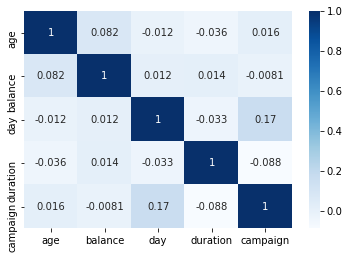

In [5]:
corr = Term_Deposit_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues')

In [6]:
print("Count of client subscribed to a term deposit: ", len(Term_Deposit_data[Term_Deposit_data["y"]=='yes']))
print("Count of client not subscribed to a term deposit: ", len(Term_Deposit_data[Term_Deposit_data["y"]=='no']))

Count of client subscribed to a term deposit:  2896
Count of client not subscribed to a term deposit:  37104


In [7]:
converted_term_deposit = pd.DataFrame()

In [8]:
job_dict ={ job:i for i, job in enumerate(list(set(Term_Deposit_data['job'])))}
job_dict

{'unemployed': 0,
 'self-employed': 1,
 'services': 2,
 'technician': 3,
 'management': 4,
 'blue-collar': 5,
 'unknown': 6,
 'admin': 7,
 'retired': 8,
 'housemaid': 9,
 'student': 10,
 'entrepreneur': 11}

In [9]:
Term_Deposit_data['job'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


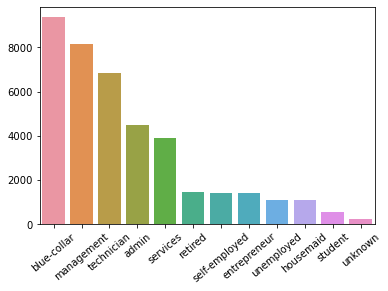

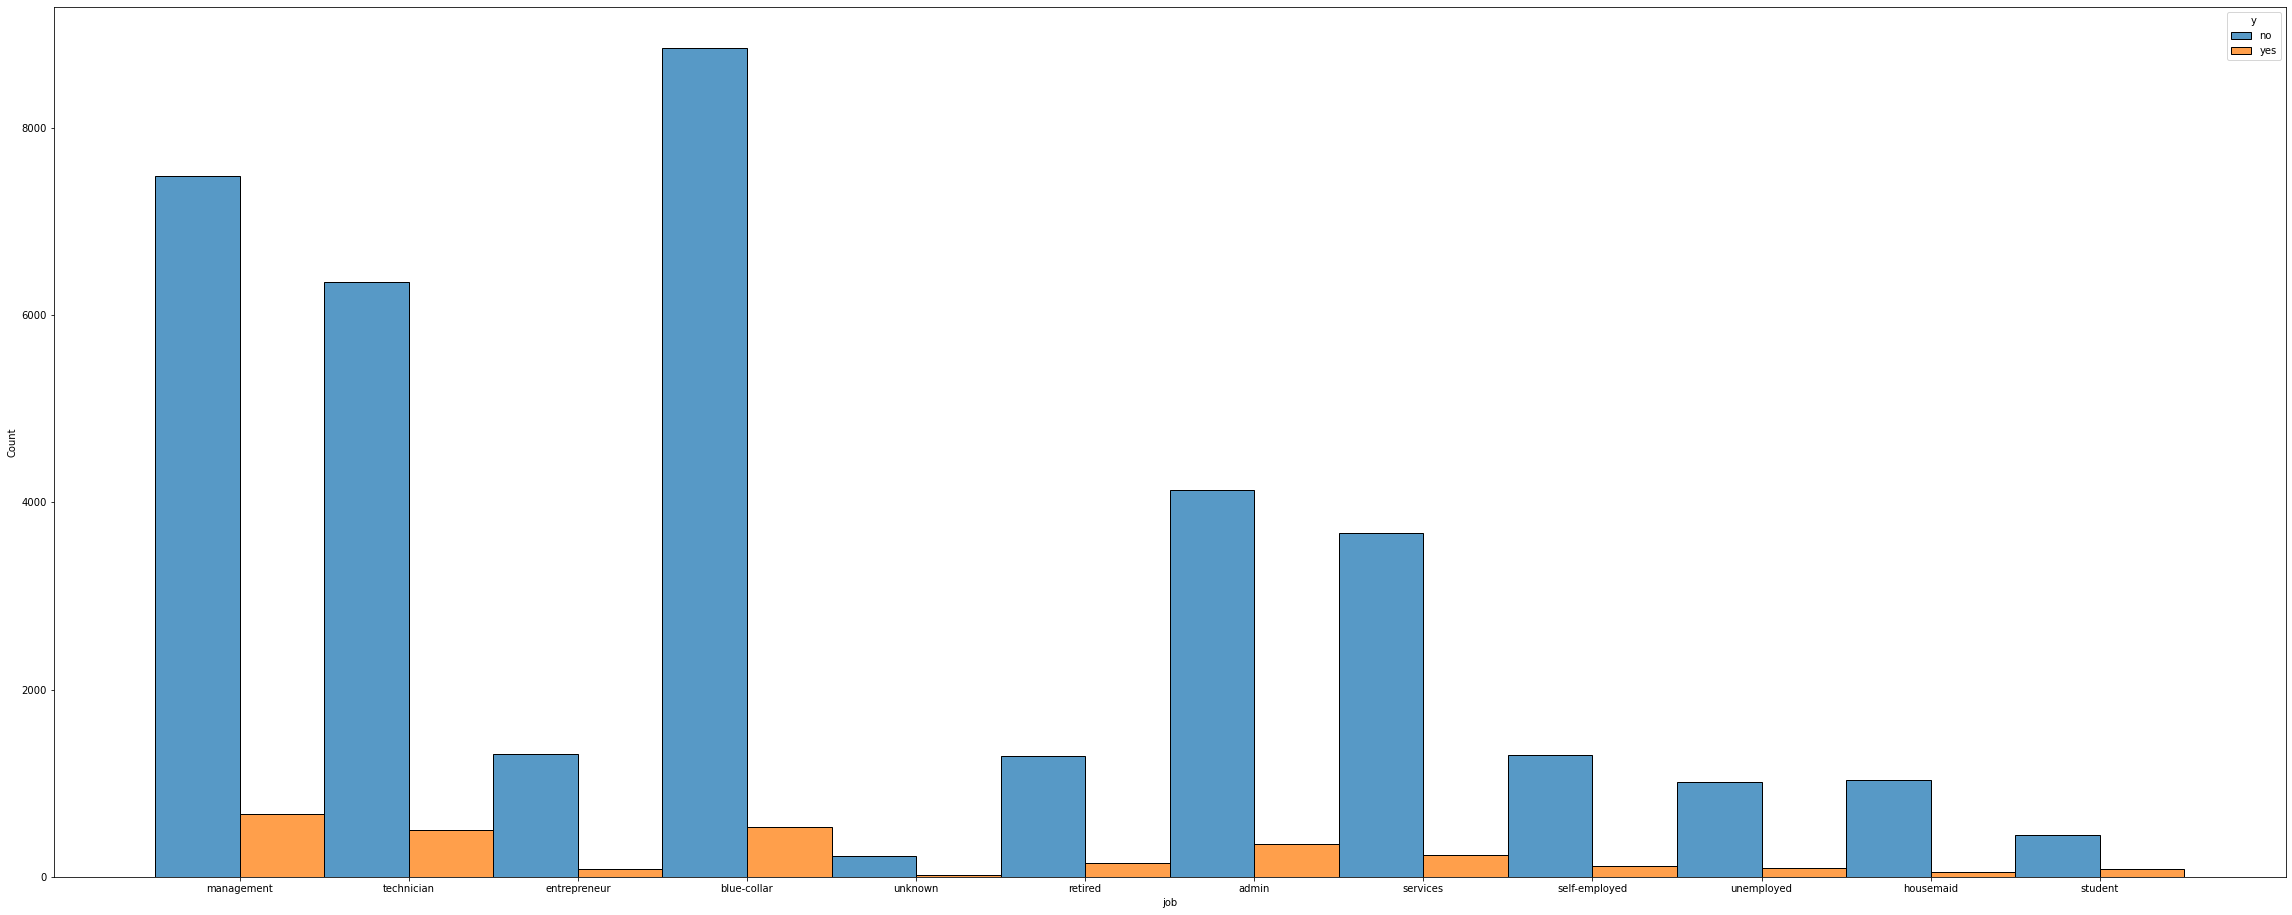

In [10]:
ax = sns.barplot(Term_Deposit_data['job'].value_counts().index, Term_Deposit_data['job'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='job', hue="y", multiple="dodge")
plt.show()

In [11]:
converted_term_deposit['job'] = Term_Deposit_data['job'].apply(lambda x: job_dict[x])

In [12]:
marital_dict ={ marital:i for i, marital in enumerate(list(set(Term_Deposit_data['marital'])))}
marital_dict

{'single': 0, 'married': 1, 'divorced': 2}

In [13]:
Term_Deposit_data['marital'].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


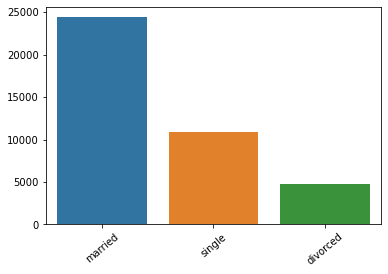

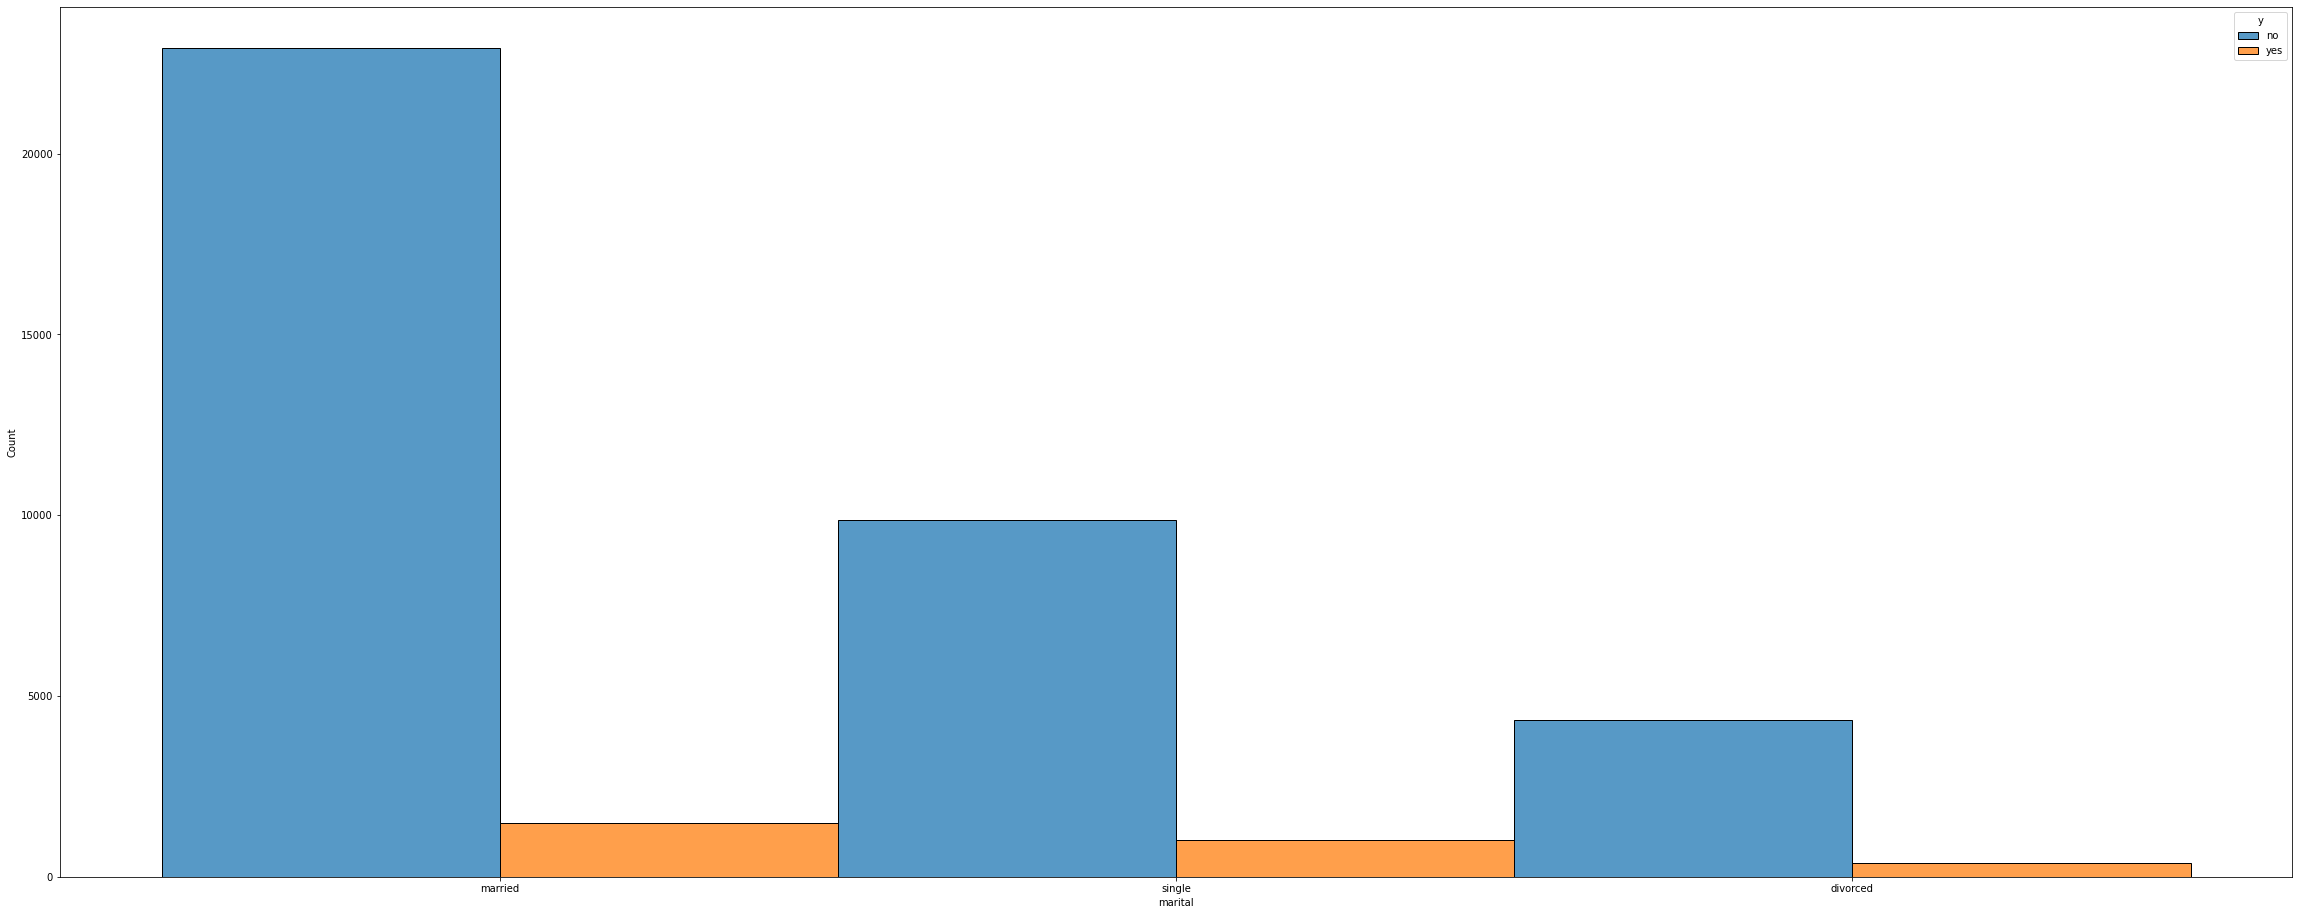

In [14]:
ax = sns.barplot(Term_Deposit_data['marital'].value_counts().index, Term_Deposit_data['marital'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='marital', hue="y", multiple="dodge")
plt.show()

In [15]:
converted_term_deposit['marital'] = Term_Deposit_data['marital'].apply(lambda x: marital_dict[x])

In [16]:
education_dict ={ education:i for i, education in enumerate(list(set(Term_Deposit_data['education'])))}
education_dict

{'primary': 0, 'unknown': 1, 'tertiary': 2, 'secondary': 3}

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


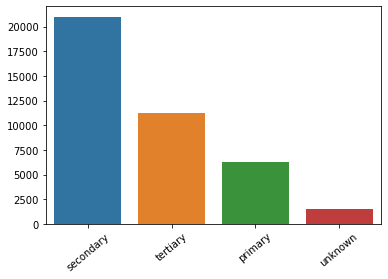

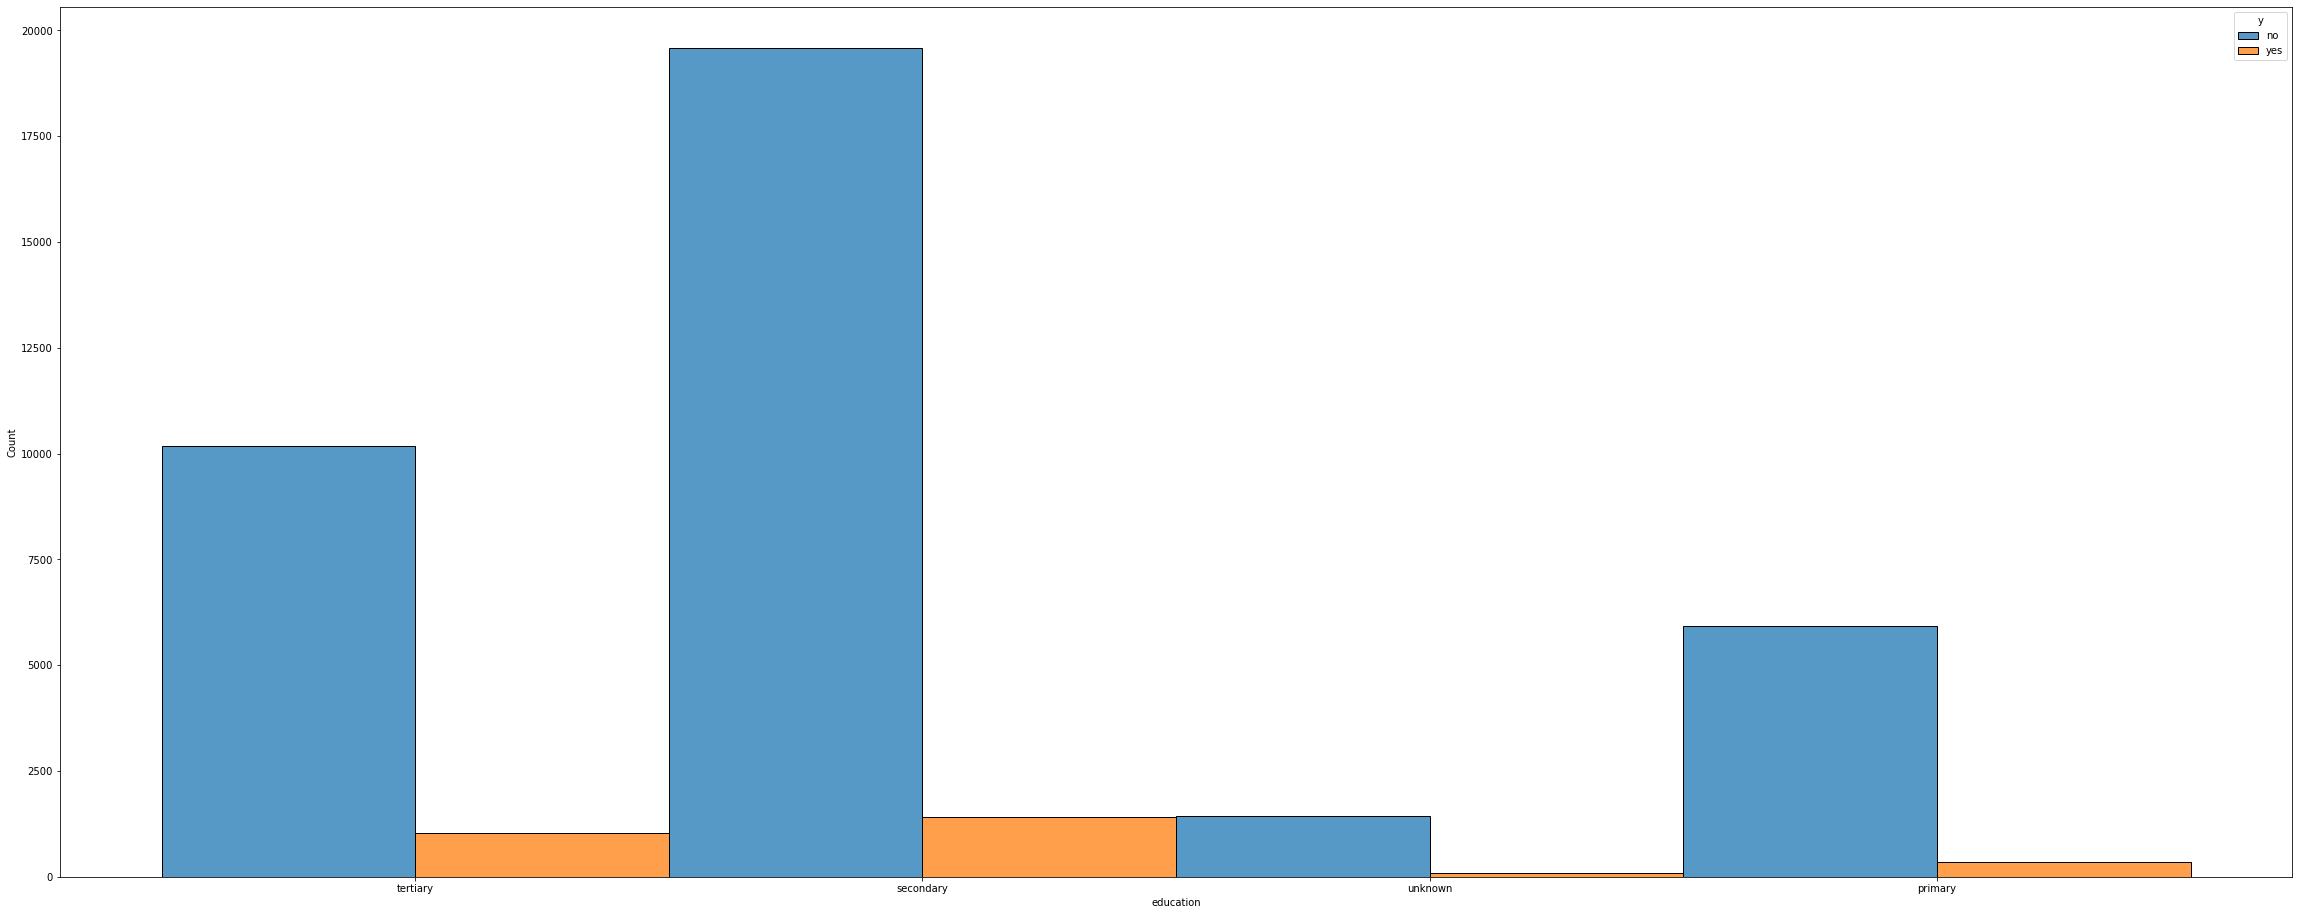

In [17]:
ax = sns.barplot(Term_Deposit_data['education'].value_counts().index, Term_Deposit_data['education'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='education', hue="y", multiple="dodge")
plt.show()

In [18]:
converted_term_deposit['education'] = Term_Deposit_data['education'].apply(lambda x: education_dict[x])

In [19]:
default_dict ={'no': 0, 'yes': 1}
default_dict

{'no': 0, 'yes': 1}

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


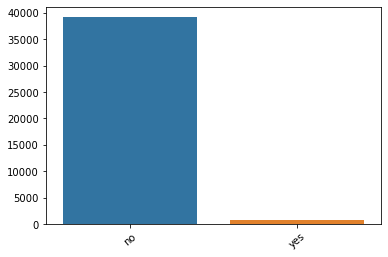

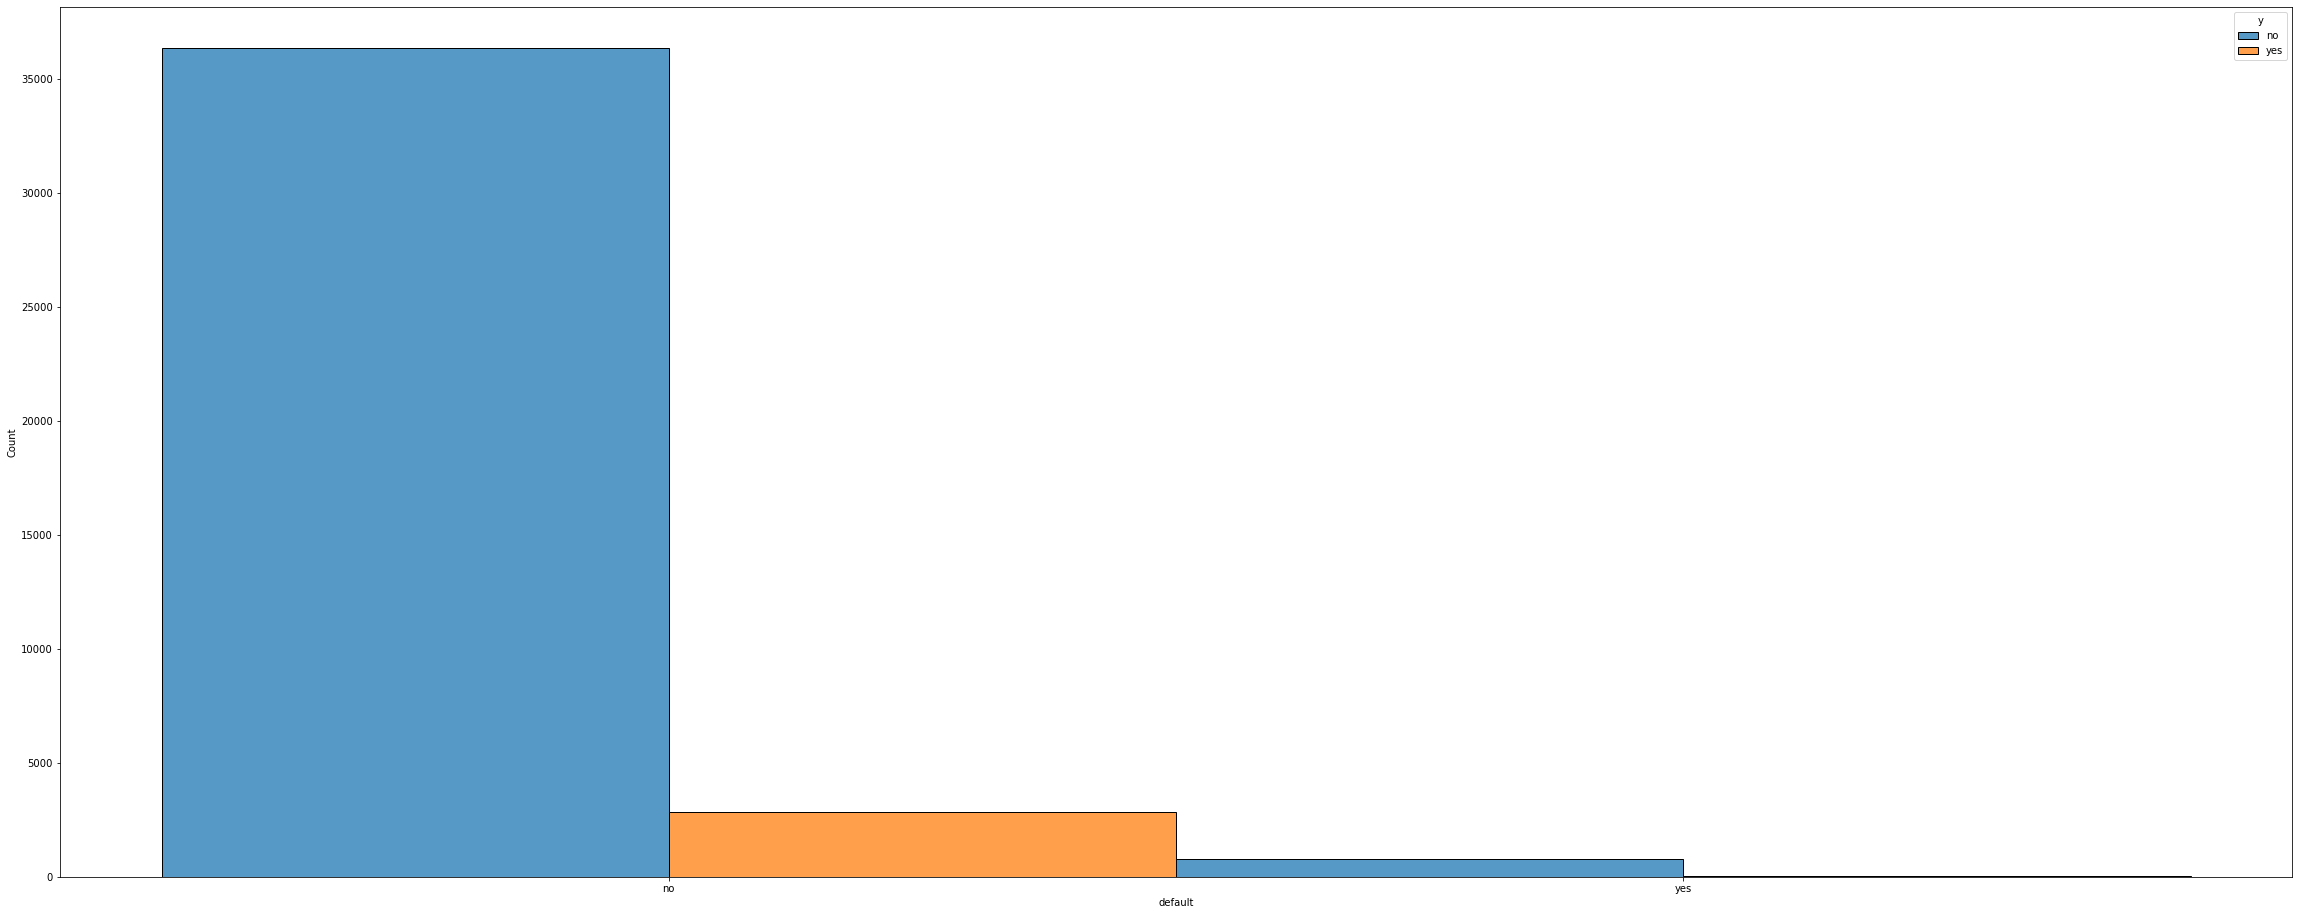

In [20]:
ax = sns.barplot(Term_Deposit_data['default'].value_counts().index, Term_Deposit_data['default'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='default', hue="y", multiple="dodge")
plt.show()

In [21]:
converted_term_deposit['default'] = Term_Deposit_data['default'].apply(lambda x: default_dict[x])

In [22]:
contact_dict ={ contact:i for i, contact in enumerate(list(set(Term_Deposit_data['contact'])))}
contact_dict

{'unknown': 0, 'telephone': 1, 'cellular': 2}

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


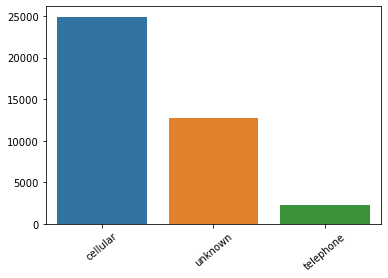

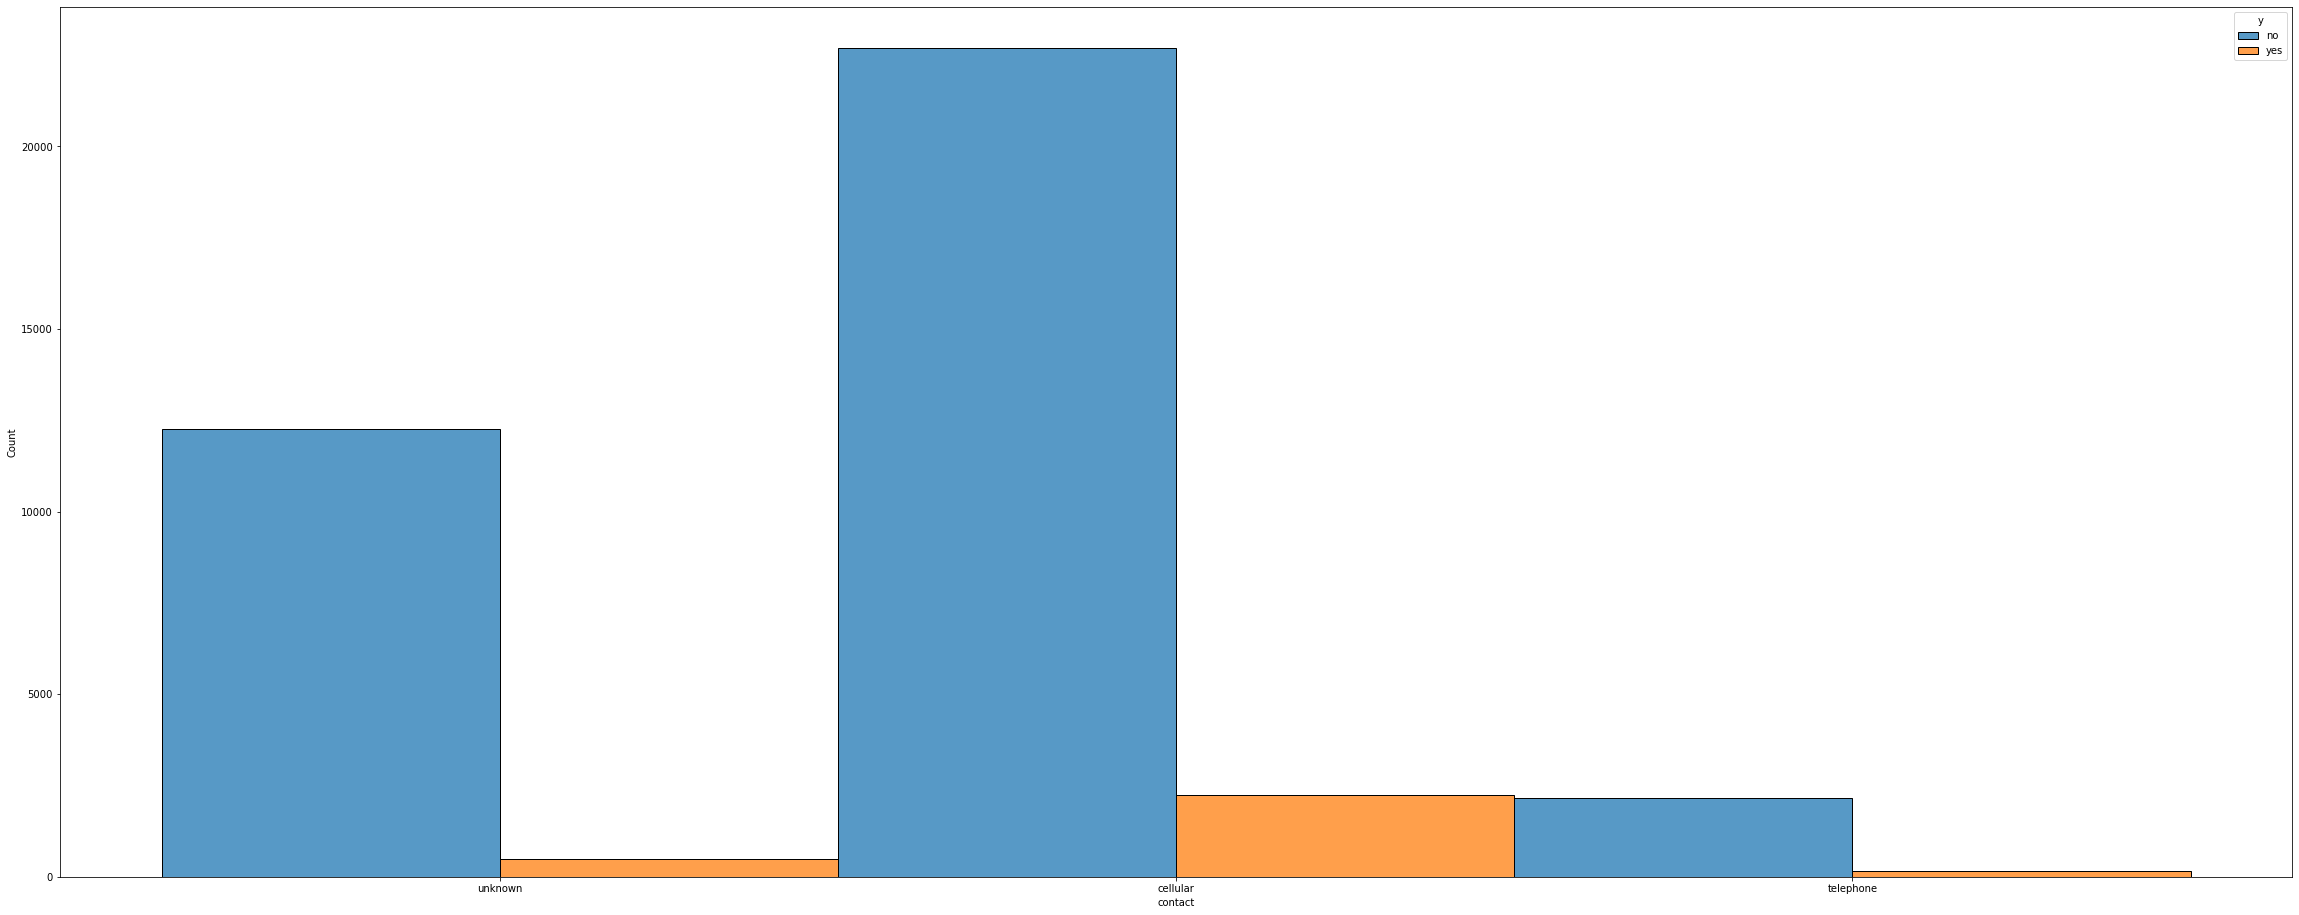

In [23]:
ax = sns.barplot(Term_Deposit_data['contact'].value_counts().index, Term_Deposit_data['contact'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='contact', hue="y", multiple="dodge")
plt.show()

In [24]:
converted_term_deposit['contact'] = Term_Deposit_data['contact'].apply(lambda x: contact_dict[x])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


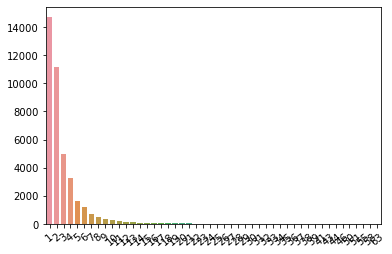

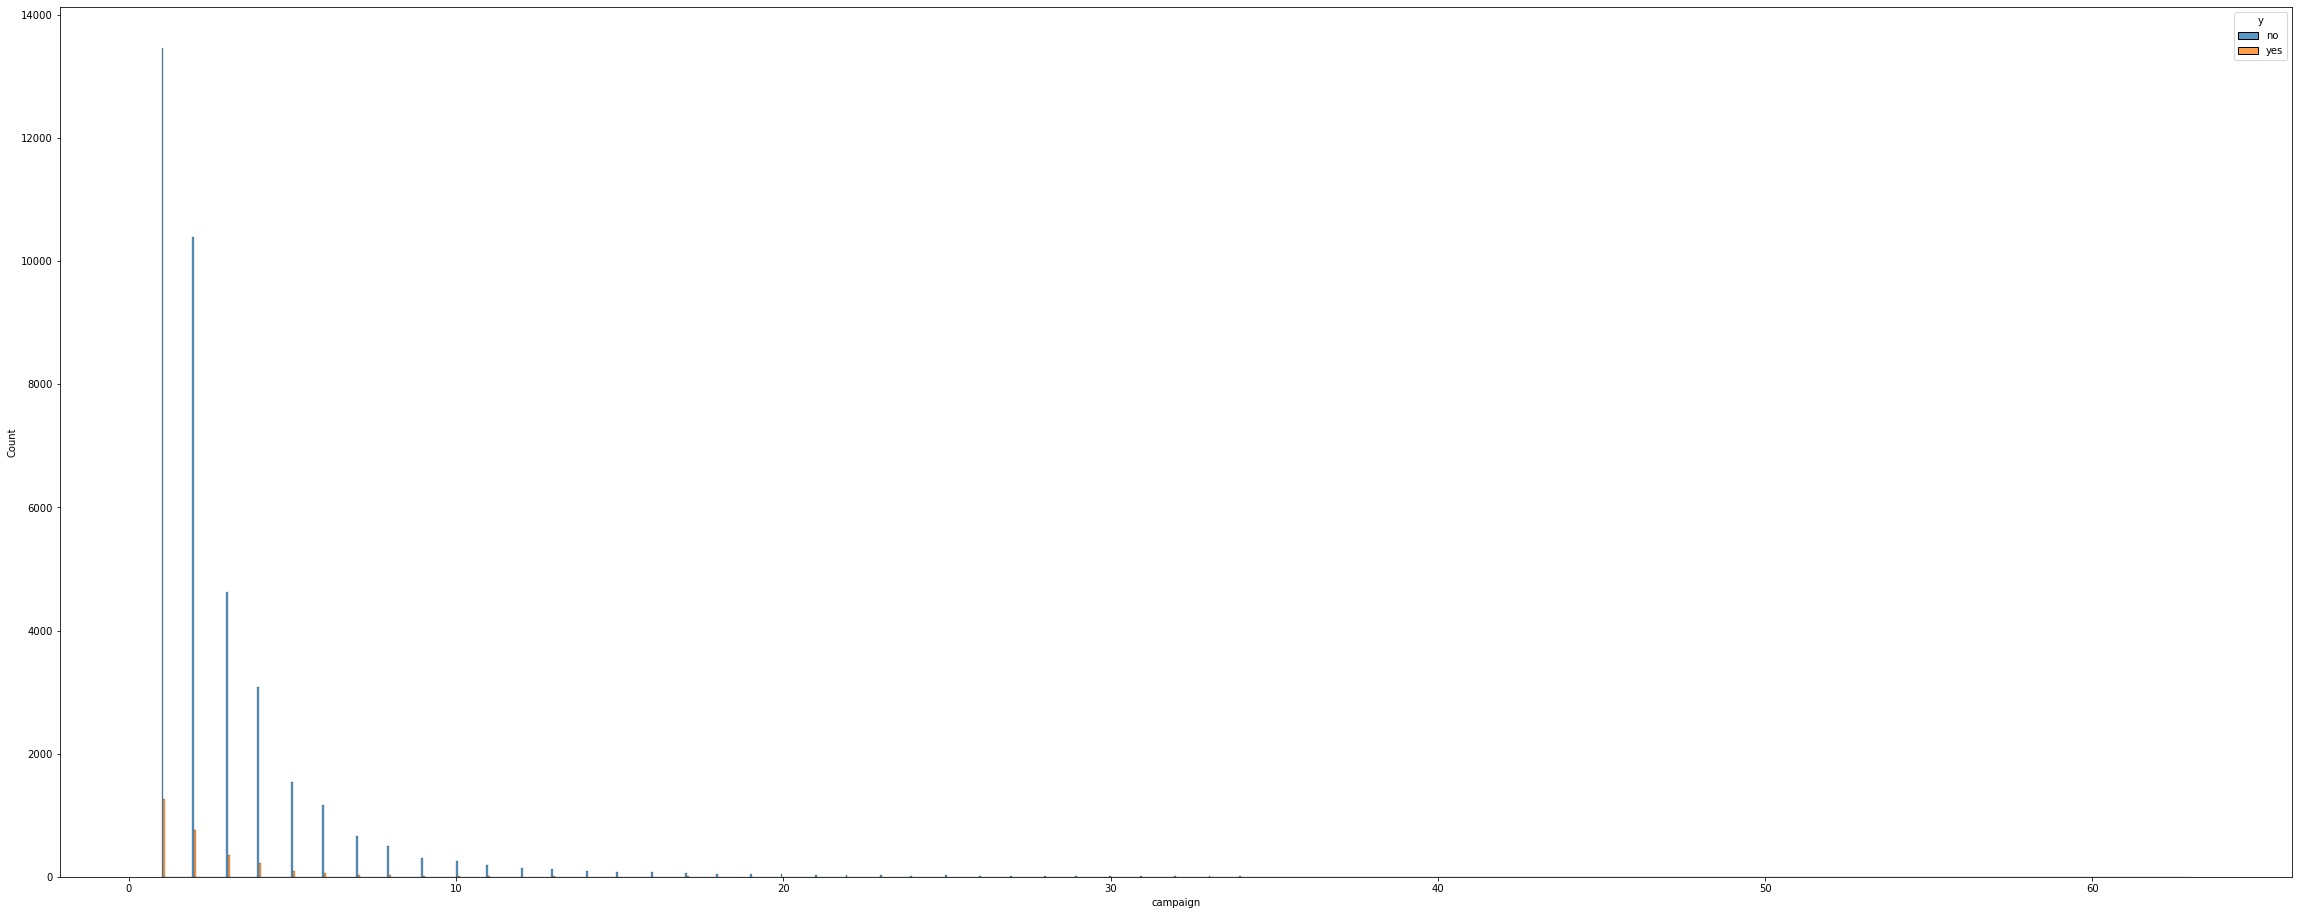

In [25]:
ax = sns.barplot(Term_Deposit_data['campaign'].value_counts().index, Term_Deposit_data['campaign'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='campaign', hue="y", multiple="dodge")
plt.show()

In [26]:
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
converted_term_deposit['month'] = Term_Deposit_data['month'].apply(lambda x: month_dict[x])

In [91]:
converted_term_deposit['y'] = Term_Deposit_data['y'].apply(lambda x:0 if x == 'no' else 1)
converted_term_deposit

,job,marital,education,default,contact,month,y,age,balance,day,duration,campaign
0,4,1,2,0,0,5,0,58,2143,5,261,1
1,3,0,3,0,0,5,0,44,29,5,151,1
2,11,1,3,0,0,5,0,33,2,5,76,1
3,5,1,1,0,0,5,0,47,1506,5,92,1
4,6,0,1,0,0,5,0,33,1,5,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3,1,2,0,2,6,0,53,395,3,107,1
39996,4,0,2,0,2,6,1,30,3340,3,238,3
39997,7,2,3,0,2,6,1,54,200,3,170,1
39998,4,1,2,0,2,6,0,34,1047,3,342,1


In [92]:
crosstab = pd.crosstab(converted_term_deposit['month'], converted_term_deposit['y'], margins=True)
crosstab

y,0,1,All
month,,,
1,1138,38,1176
2,2041,255,2296
3,133,125,258
4,2267,451,2718
5,12741,791,13532
6,4440,294,4734
7,5996,384,6380
8,4927,288,5215
10,31,49,80


In [111]:
feature_cat = ['job', 'marital', 'education', 'default', 'contact', 'campaign']
def chi_square(feature, feature2 = 'NA'):
    if feature2 == 'NA':
        feature2 = 'y'
    crosstab = pd.crosstab(converted_term_deposit[feature], converted_term_deposit[feature2], margins=True)
    statistical_value, p_value, deg_of_freedom= chi2_contingency(crosstab.iloc[:-1,:-1])[0:3]
    print('feature: ', feature, ', feature 2: ', feature2,', p value: ', p_value, ', p value > 0.05', p_value > 0.05)

In [112]:
for feature in converted_term_deposit[feature_cat]:
    chi_square(feature)

feature:  job , feature 2:  y , p value:  1.6761348063575326e-26 , p value > 0.05 False
feature:  marital , feature 2:  y , p value:  3.091030601234065e-30 , p value > 0.05 False
feature:  education , feature 2:  y , p value:  8.061910845440752e-21 , p value > 0.05 False
feature:  default , feature 2:  y , p value:  0.21373529827845061 , p value > 0.05 True
feature:  contact , feature 2:  y , p value:  7.242046790893985e-71 , p value > 0.05 False
feature:  campaign , feature 2:  y , p value:  5.174950485116002e-06 , p value > 0.05 False


In [113]:
feature_used =[]
for feature1 in converted_term_deposit[feature_cat]:
    for feature2 in converted_term_deposit[feature_cat]:
        if feature1 == feature2 or feature2 in feature_used:
            pass
        else:
            chi_square(feature1, feature2)
    feature_used.append(feature1)
            

feature:  job , feature 2:  marital , p value:  0.0 , p value > 0.05 False
feature:  job , feature 2:  education , p value:  0.0 , p value > 0.05 False
feature:  job , feature 2:  default , p value:  1.448828986492023e-05 , p value > 0.05 False
feature:  job , feature 2:  contact , p value:  2.2774179910412064e-231 , p value > 0.05 False
feature:  job , feature 2:  campaign , p value:  1.0780728833450866e-06 , p value > 0.05 False
feature:  marital , feature 2:  education , p value:  6.413890448184004e-243 , p value > 0.05 False
feature:  marital , feature 2:  default , p value:  0.0005171320247111738 , p value > 0.05 False
feature:  marital , feature 2:  contact , p value:  4.9666756715713015e-27 , p value > 0.05 False
feature:  marital , feature 2:  campaign , p value:  3.899614562268539e-06 , p value > 0.05 False
feature:  education , feature 2:  default , p value:  0.06888688045212739 , p value > 0.05 True
feature:  education , feature 2:  contact , p value:  3.497855131401551e-218

In [31]:
converted_term_deposit['age'] = Term_Deposit_data['age']
converted_term_deposit['balance'] = Term_Deposit_data['balance']
converted_term_deposit['day'] = Term_Deposit_data['day']
converted_term_deposit['duration'] = Term_Deposit_data['duration']
converted_term_deposit['campaign'] = Term_Deposit_data['campaign']

converted_term_deposit

,job,marital,education,default,contact,month,y,age,balance,day,duration,campaign
0,4,1,2,0,0,5,0,58,2143,5,261,1
1,3,0,3,0,0,5,0,44,29,5,151,1
2,11,1,3,0,0,5,0,33,2,5,76,1
3,5,1,1,0,0,5,0,47,1506,5,92,1
4,6,0,1,0,0,5,0,33,1,5,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3,1,2,0,2,6,0,53,395,3,107,1
39996,4,0,2,0,2,6,1,30,3340,3,238,3
39997,7,2,3,0,2,6,1,54,200,3,170,1
39998,4,1,2,0,2,6,0,34,1047,3,342,1


In [32]:
term_deposit = converted_term_deposit.drop(columns=['default'])
term_deposit

,job,marital,education,contact,month,y,age,balance,day,duration,campaign
0,4,1,2,0,5,0,58,2143,5,261,1
1,3,0,3,0,5,0,44,29,5,151,1
2,11,1,3,0,5,0,33,2,5,76,1
3,5,1,1,0,5,0,47,1506,5,92,1
4,6,0,1,0,5,0,33,1,5,198,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,3,1,2,2,6,0,53,395,3,107,1
39996,4,0,2,2,6,1,30,3340,3,238,3
39997,7,2,3,2,6,1,54,200,3,170,1
39998,4,1,2,2,6,0,34,1047,3,342,1


In [33]:
from pycaret.classification import *
#set up a session and search for the best models based on accuracy
s1 = setup(term_deposit, target='y', session_id = seed)
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9376,0.9473,0.4101,0.6093,0.4897,0.4579,0.4684,5.9130
lightgbm,Light Gradient Boosting Machine,0.9371,0.9466,0.4145,0.6015,0.4900,0.4578,0.4672,0.6160
gbc,Gradient Boosting Classifier,0.9364,0.9404,0.3470,0.6151,0.4429,0.4120,0.4314,1.5840
xgboost,Extreme Gradient Boosting,0.9349,0.9421,0.4120,0.5757,0.4800,0.4463,0.4535,1.6950
rf,Random Forest Classifier,0.9344,0.9360,0.3119,0.5978,0.4084,0.3774,0.4006,1.0290
lda,Linear Discriminant Analysis,0.9329,0.9255,0.4306,0.5532,0.4835,0.4483,0.4527,0.1580
lr,Logistic Regression,0.9326,0.9215,0.2546,0.5931,0.3554,0.3258,0.3589,3.2320
ada,Ada Boost Classifier,0.9310,0.9279,0.3275,0.5469,0.4087,0.3745,0.3889,0.4310
et,Extra Trees Classifier,0.9308,0.9198,0.2297,0.5638,0.3255,0.2960,0.3298,1.1210
ridge,Ridge Classifier,0.9305,0.0000,0.1476,0.6006,0.2363,0.2137,0.2734,0.0360


In [34]:
import shap
shap.initjs()

In [35]:
explainer = shap.Explainer(top3[2])

In [42]:
sv = explainer(term_deposit.drop(columns=['y']),check_additivity=False)
sv

.values =
array([[ 2.91025129e-01, -8.27441633e-02,  5.59222867e-02, ...,
         1.39538236e-01,  0.00000000e+00,  0.00000000e+00],
       [ 2.95114809e-01, -2.43068852e-01,  1.66869659e-01, ...,
         1.05386992e-01,  1.37411768e-04,  0.00000000e+00],
       [ 4.27767566e-01, -3.10671790e-01, -1.56252527e-01, ...,
         1.86710013e-01,  1.37411768e-04,  5.06084726e-01],
       ...,
       [ 1.17674067e+00, -3.14240620e-01,  7.30662625e-01, ...,
         2.20310757e-01,  1.37411768e-04,  3.85768125e-01],
       [ 1.18484797e+00, -2.18839886e-01,  7.87307233e-01, ...,
         2.98596592e-01,  2.46468848e-04,  3.85768125e-01],
       [ 1.10483341e+00, -2.33217827e-02,  8.58695359e-01, ...,
         2.97655069e-01,  2.46468848e-04, -3.80754543e-02]])

.base_values =
array([[-3.82802949],
       [-3.82802949],
       [-3.82802949],
       ...,
       [-3.82802949],
       [-3.82802949],
       [-3.82802949]])

.data =
array([[  4,   1,   2, ...,   5, 261,   1],
       [  3,   0,  

In [64]:
shap.force_plot(explainer.expected_value, sv.values[0,:],term_deposit.drop(columns=['y']).iloc[0,:])

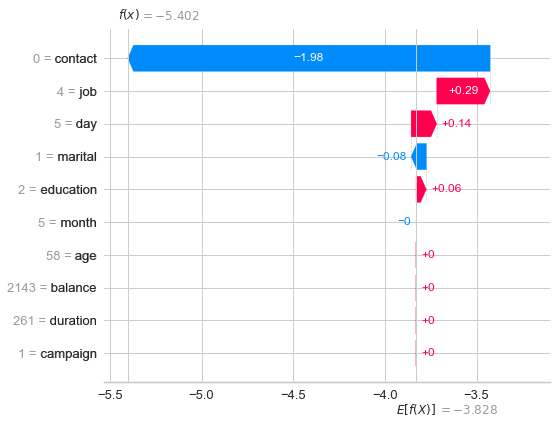

In [60]:
shap_object = shap.Explanation(base_values = sv[0][0].base_values,
values = sv[0].values,
feature_names = term_deposit.drop(columns=['y']).columns,
data = sv[0].data)

shap.plots.waterfall(shap_object)

In [77]:
term_deposit.drop(columns=['y'])

,job,marital,education,contact,month,age,balance,day,duration,campaign
0,4,1,2,0,5,58,2143,5,261,1
1,3,0,3,0,5,44,29,5,151,1
2,11,1,3,0,5,33,2,5,76,1
3,5,1,1,0,5,47,1506,5,92,1
4,6,0,1,0,5,33,1,5,198,1
...,...,...,...,...,...,...,...,...,...,...
39995,3,1,2,2,6,53,395,3,107,1
39996,4,0,2,2,6,30,3340,3,238,3
39997,7,2,3,2,6,54,200,3,170,1
39998,4,1,2,2,6,34,1047,3,342,1


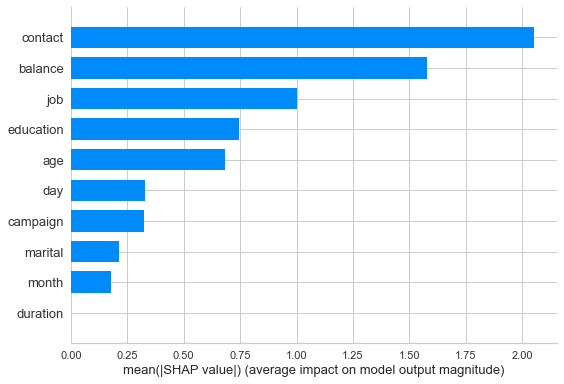

In [78]:
shap.summary_plot(sv.values, term_deposit.drop(columns=['y']), plot_type="bar")

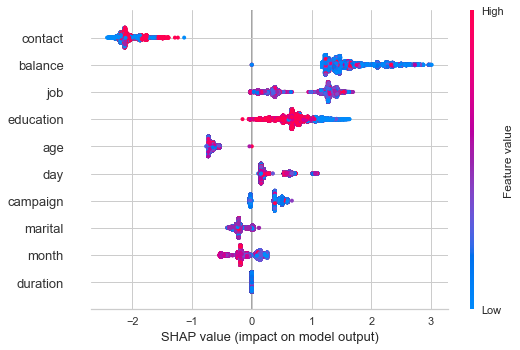

In [80]:
shap.plots.beeswarm(sv)